In [5]:
#CODE FOR THE CREATING SUBFOLDER TRAIN AND TESTE CAT DOG AND MOVE IMAGES RATIO 10 VALIDTON AND TRAIN 10 PERT

import os
import shutil
import random

# Paths to your dataset directories
train_dir = 'cats_dogs_light/train'
test_dir = 'cats_dogs_light/test'
validation_dir = 'cats_dogs_light/validation'

# Create subfolders in train, test, and validation for 'cat' and 'dog'
os.makedirs(train_dir + '/cat', exist_ok=True)
os.makedirs(train_dir + '/dog', exist_ok=True)
os.makedirs(test_dir + '/cat', exist_ok=True)
os.makedirs(test_dir + '/dog', exist_ok=True)
os.makedirs(validation_dir + '/cat', exist_ok=True)
os.makedirs(validation_dir + '/dog', exist_ok=True)

# Move files into the subfolders based on the filename
def move_files_to_class_folders(source_dir, category):
    # List all files in the directory
    for file_name in os.listdir(source_dir):
        # Full file path
        file_path = os.path.join(source_dir, file_name)
        
        # Ensure it is a file, not a directory
        if os.path.isfile(file_path) and category in file_name.lower():
            # Move the file to the respective folder
            shutil.move(file_path, os.path.join(source_dir, category, file_name))

# Move 'cat' and 'dog' images into their respective subfolders
move_files_to_class_folders(train_dir, 'cat')
move_files_to_class_folders(train_dir, 'dog')
move_files_to_class_folders(test_dir, 'cat')
move_files_to_class_folders(test_dir, 'dog')

# Now split exactly 10% of the training data into the validation folder
def move_files_to_validation(class_dir, validation_class_dir, split_ratio=0.1):
    # List all files in the class folder
    files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    
    # Calculate the exact number of images to move (10% of total)
    num_images_to_move = int(len(files) * split_ratio)
    
    # Ensure random but consistent selection
    selected_files = random.sample(files, num_images_to_move)
    
    # Move the selected files to the validation folder
    for file_name in selected_files:
        shutil.move(os.path.join(class_dir, file_name), os.path.join(validation_class_dir, file_name))

# Move exactly 10% of cat and dog images from train to validation
move_files_to_validation(train_dir + '/cat', validation_dir + '/cat')
move_files_to_validation(train_dir + '/dog', validation_dir + '/dog')

# Verify and print the counts for each folder
def print_folder_counts():
    print(f"Training cat images: {len(os.listdir(train_dir + '/cat'))}")
    print(f"Training dog images: {len(os.listdir(train_dir + '/dog'))}")
    print(f"Validation cat images: {len(os.listdir(validation_dir + '/cat'))}")
    print(f"Validation dog images: {len(os.listdir(validation_dir + '/dog'))}")
    print(f"Test cat images: {len(os.listdir(test_dir + '/cat'))}")
    print(f"Test dog images: {len(os.listdir(test_dir + '/dog'))}")

print_folder_counts()
print("Dataset organized successfully!")


Training cat images: 369
Training dog images: 442
Validation cat images: 86
Validation dog images: 103
Test cat images: 200
Test dog images: 200
Dataset organized successfully!


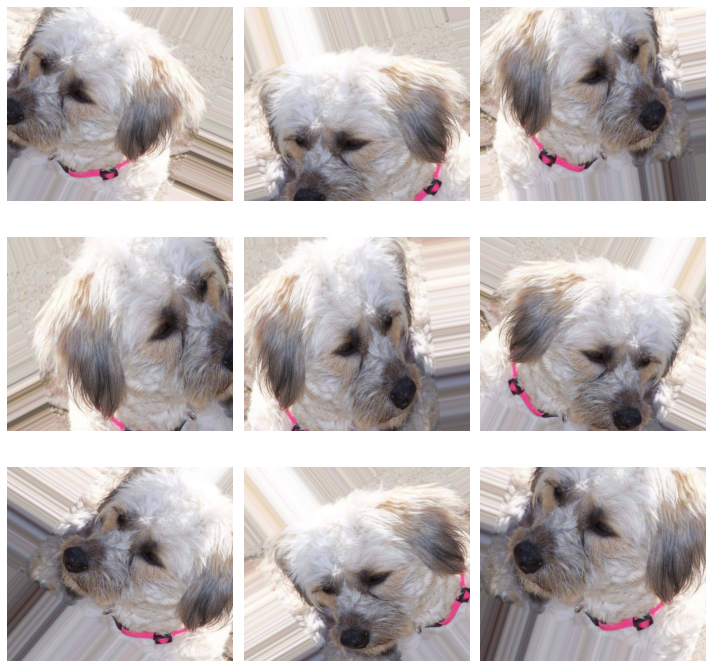

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Step 1: Create an instance of ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 2: Load a sample image (make sure to specify the correct path)
img_path = 'PIC.jpg'  # Change this to your image path
img = load_img(img_path)  # Load image
x = img_to_array(img)  # Convert image to array
x = x.reshape((1,) + x.shape)  # Reshape for the generator

# Step 3: Generate augmented images
augmented_images = datagen.flow(x, batch_size=1)

# Step 4: Visualize the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    batch = augmented_images.next()  # Get the next augmented image
    image = batch[0].astype('uint8')  # Convert to uint8 format for display
    plt.imshow(image)  # Show the image
    plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#ڈیٹا کی پیشگی پروسیسنگ اور توسیع
#کہانی: علی نے اپنے ٹریننگ کے ڈیٹا کو بڑھانے کا فیصلہ کیا۔ اس نے مختلف تکنیکوں کا استعمال کیا جیسے کہ چکر دینا، موڑنا اور زوم کرنا، تاکہ ماڈل کو مختلف قسم کی تصاویر ملیں۔ اس نے تصدیق اور ٹیسٹ کے لیے بھی سادہ معمولات طے کیے


train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalizing pixel values
    rotation_range=20,             # Randomly rotate images
    width_shift_range=0.2,         # Randomly shift images horizontally
    height_shift_range=0.2,        # Randomly shift images vertically
    shear_range=0.2,               # Randomly shear images
    zoom_range=0.2,                # Randomly zoom into images
    horizontal_flip=True,          # Randomly flip images horizontally
    fill_mode='nearest'            # Fill in missing pixels
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only normalizing validation data
test_datagen = ImageDataGenerator(rescale=1./255)        # Normalizing test data


#3. تصاویر کو ڈائریکٹری سے لوڈ کرنا
# علی نے تصاویر کو اپنے کمپیوٹر میں موجود ڈائریکٹریز سے لوڈ کرنے کا فیصلہ کیا۔ اس نے ہر ایک کلاس (بلی اور کتا) کے لیے train، validation، اور test کے مختلف فولڈرز بنائے، تاکہ وہ آسانی سے تصاویر کو منظم کر سکے۔


train_generator = train_datagen.flow_from_directory(
    'cats_dogs_light/train',       # Path to train folder
    target_size=(150, 150),        # Resizing images to 150x150
    batch_size=32,
    class_mode='binary'            # Binary classification (dog vs cat)
)

validation_generator = validation_datagen.flow_from_directory(
    'cats_dogs_light/validation',  # Path to validation folder
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'cats_dogs_light/test',        # Path to test folder
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


#4. CNN ماڈل بنانا
#علی نے اپنے ماڈل کو Convolutional Neural Network (CNN) کے طور پر بنایا۔ اس نے کنولوشن اور میکس پولنگ کی مختلف تہوں کا استعمال کیا تاکہ ماڈل مختلف خصوصیات کو سیکھ سکے۔ ڈراپ آؤٹ کا استعمال کیا تاکہ اوور فٹنگ سے بچا جا سکے




model = Sequential()

# First Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolution Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolution Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolution Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))

# Dropout to avoid overfitting
model.add(Dropout(0.5))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))

#ماڈل کو مرتب کرنا COMPILE
# علی نے ماڈل کو مرتب کیا، یعنی اسے سکھانے کے لئے تیار کیا۔ اس نے آدم آپٹیمائزر اور بائنری کراس اینٹروپی نقصان کے فنکشن کا استعمال کیا تاکہ وہ بہترین نتائج حاصل کر سکے۔


model.compile(
    loss='binary_crossentropy',  # Binary classification
    optimizer='adam',            # Adam optimizer
    metrics=['accuracy']         # Evaluating accuracy
)



#6. ابتدائی روک تھام مرتب کرنا
#علی جانتا تھا کہ کبھی کبھی ماڈل ٹریننگ کے دوران اوور فٹ ہو جاتا ہے۔ اس لیے اس نے ابتدائی روک تھام شامل کی تاکہ اگر ماڈل کی کارکردگی مزید بہتر نہ ہو تو اسے روک دیا جائے۔

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)





#7. ماڈل کو تربیت دینا
#علی نے اپنے ماڈل کو 150 ادوار تک تربیت دینے کا فیصلہ کیا۔ اس نے train اور validation کے ڈیٹا کا استعمال کیا تاکہ یہ جان سکے کہ ماڈل صحیح سیکھ رہا ہے یا نہیں

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=150,                    # You can experiment with this number
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]      # Early stopping to prevent overfitting
)



#8. ماڈل کا ٹیسٹ ڈیٹا پر جانچنا
# آخر میں، علی نے ماڈل کی کارکردگی کو ٹیسٹ ڈیٹا پر جانچنے کا فیصلہ کیا۔ اس نے ٹیسٹ کی درستگی کو دیکھا تاکہ یہ جان سکے کہ اس کا ماڈل کتنی اچھی طرح کام کر رہا ہے

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)




Found 901 images belonging to 2 classes.
Found 99 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/150
29/29 [==============================] - 8s 267ms/step - loss: 0.7677 - accuracy: 0.5438 - val_loss: 0.6834 - val_accuracy: 0.5455
Epoch 2/150
29/29 [==============================] - 8s 259ms/step - loss: 0.6917 - accuracy: 0.5450 - val_loss: 0.6835 - val_accuracy: 0.5455
Epoch 3/150
29/29 [==============================] - 8s 265ms/step - loss: 0.6891 - accuracy: 0.5450 - val_loss: 0.6841 - val_accuracy: 0.5455
Epoch 4/150
29/29 [==============================] - 9s 310ms/step - loss: 0.6783 - accuracy: 0.5450 - val_loss: 0.6751 - val_accuracy: 0.5455
Epoch 5/150
29/29 [==============================] - 9s 313ms/step - loss: 0.6757 - accuracy: 0.5505 - val_loss: 0.6740 - val_accuracy: 0.5960
Epoch 6/150
29/29 [==============================] - 9s 303ms/step - loss: 0.6773 - accuracy: 0.5549 - val_loss: 0.6509 - val_accuracy: 0.5758
Epoch 7/150
29/29 [=

13/13 [==============================] - 1s 69ms/step
Precision: 0.4957
Recall: 0.5700


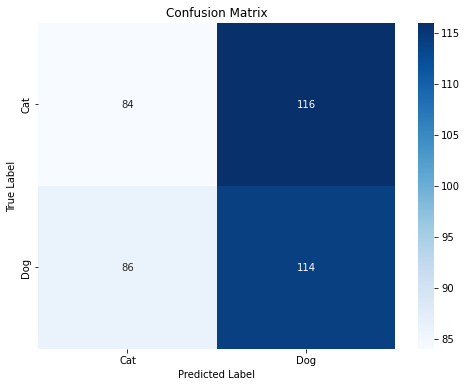

              precision    recall  f1-score   support

         Cat       0.49      0.42      0.45       200
         Dog       0.50      0.57      0.53       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400



In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make Predictions
# Get the test images and labels
test_generator.reset()  # Reset the generator
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary class labels

# Step 2: Get True Labels
true_classes = test_generator.classes  # Get true labels from the generator

# Step 3: Calculate Precision, Recall, and Confusion Matrix
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Classification Report (optional)
print(classification_report(true_classes, predicted_classes, target_names=['Cat', 'Dog']))
